In [1]:
## import essential modules 
import qumcmc 
from qumcmc.basic_utils import *
from qumcmc.energy_models import *

from qumcmc.classical_mcmc_routines import classical_mcmc
# from qumcmc.quantum_mcmc_routines_qiskit import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 
# from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc   #for qulacs backend (**faster)
from QuantumSamplingRoutines import *
from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics

import pickle, json 

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [3]:
from qiskit_ibm_provider import IBMProvider
# # provider = IBMProvider(token= '0c4a11984552ee16d40f9f7ad8848d8393c9010d55e924306fbc7486c2c55927173b79841d947e255fdbc927079265ed02aa66f10895a50367a0fd97bc6de628')
# # provider.save_account(token= '0c4a11984552ee16d40f9f7ad8848d8393c9010d55e924306fbc7486c2c55927173b79841d947e255fdbc927079265ed02aa66f10895a50367a0fd97bc6de628', overwrite= True)
provider = IBMProvider()


#### **Testing Backend**

In [5]:
ibmq_guadalupe = provider.get_backend('ibmq_guadalupe'); ibmq_lima = provider.get_backend('ibmq_lima')

In [19]:
r = ibmq_guadalupe.configuration()

#### **Test Trial**

            MODEL : n2sd10923
Non-zero Interactions (J) : 1 / 1
Non-zero Bias (h) : 2 / 2
---------------------------------------------
Average Interaction Strength <|J|> :  0.3425
Average Bias Strength <|h|>:  0.19
alpha :  1.909313313651758
---------------------------------------------


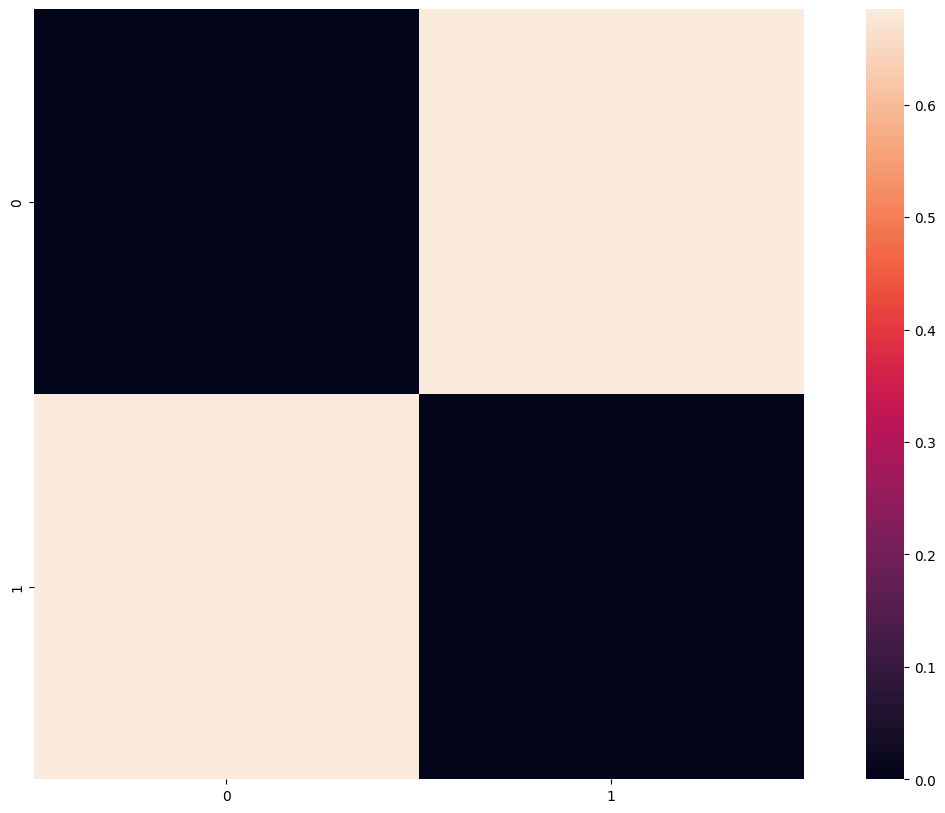

In [8]:
nspin = 2
seed = 10923; name = 'n'+str(nspin)+'sd'+str(seed)
model = random_ising_model(n_spins=nspin, seed= seed, print_model= False)
model.name = name

model.model_summary()

In [9]:
samplingjob = QuantumSamplingJob(model=model, backend= ibmq_lima)

In [10]:
gamma= 0.4 ; time= 1.0 

# samplingjob.run_quantum_circuit(gamma, time)

Circuit Built, Executing on backend 
Execution Complete


In [12]:
with open('DATA/raw-circuit-outputs/mn2sd10923id1.pickle', 'rb') as hl:
    qc = pickle.load(hl)